# TELECOM-CHURN-PREDICTION

IMPORTING LIBRARIES

In [58]:
!pip install seaborn

You should consider upgrading via the 'D:\pythonjb\python.exe -m pip install --upgrade pip' command.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET/CSV FILE

In [60]:
df = pd.read_csv(r"C:\Users\raaga\Downloads\CHURN DATASET\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [48]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EXPLORATORY DATA  ANALYSIS (EDA) 


In [49]:
# Dropping customerID

df.drop("customerID",axis="columns",inplace=True)


In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [16]:
# checking datatypes

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# 'TotalCharges' is supposed to be  numerical(float), but it's an onject(string)
# We will convert it into numerical data type

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
# 'coerce' is used inoder to error occur due to missing or null values

df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
#checking its datatype

df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
# Checking whether we have any missing values or null vales or fileds filled with spaces

In [12]:

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Total Charges has 11 missing values
# We will drop the rows with missing data and check for missing values again


In [36]:
df = df.dropna()
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [ ]:
#Empty or null rows are being removed

In [15]:
df.shape

(7032, 20)

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

C:\Users\raaga\AppData\Local\Temp\ipykernel_8260\2609136659.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'SeniorCitizen'),
  Text(1.5, 0, 'tenure'),
  Text(2.5, 0, 'MonthlyCharges')])

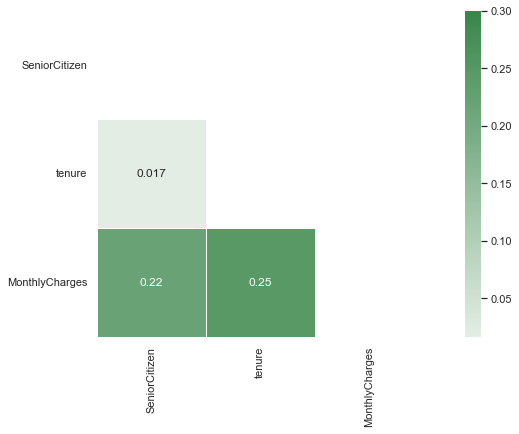

In [68]:
# Using correlation matrix to understand the correlation between numerical variables


import seaborn as sns


df_corr = df.corr()

sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

In [28]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


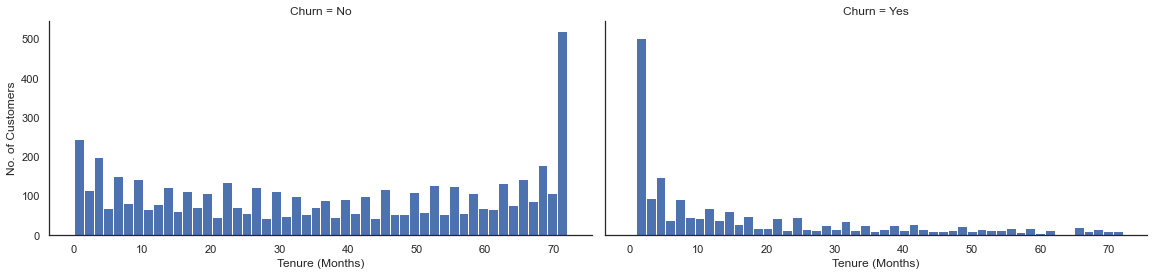

In [51]:
# Distribution of Tenure


tenure = sns.FacetGrid(data=df, col='Churn', height=4, aspect=2)
tenure.map(plt.hist, 'tenure', bins=50)



tenure.set(xlabel='Tenure (Months)', ylabel='No. of Customers')
plt.show()

In [31]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


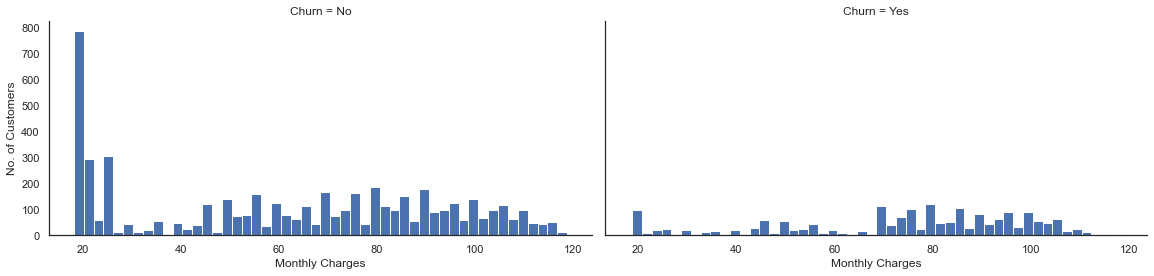

In [52]:
# Distribution of Monthly Charges

monthly = sns.FacetGrid(data=df, col='Churn', height=4, aspect=2)
monthly.map(plt.hist, 'MonthlyCharges', bins=50)


monthly.set(xlabel='Monthly Charges', ylabel='No. of Customers')
plt.show()

In [ ]:
# Customer appears to churn away more when monthly charges are high.
# We can present the plots above more intuitively using Kernel Density Estimate Plot

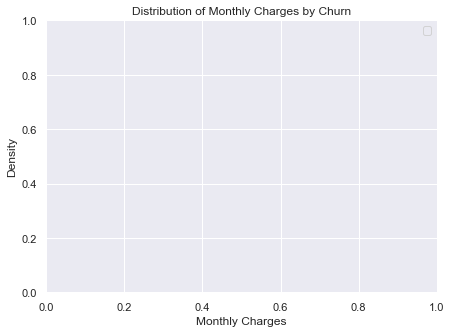

In [67]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Green", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)


# figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

In [ ]:
# Here it's evident that customers are more likely to churn when the Monthly Charges are high


D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: min() arg is an empty sequence

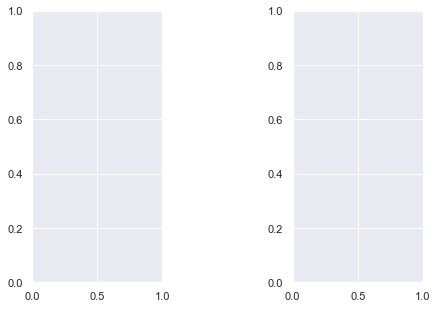

In [63]:
# Gender Analysis

df_yes = df[df['Churn']==1]
df_no = df[df['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_no['gender'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_yes['gender'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")

In [ ]:
# The male:female ratio is constant across the customer who have churned away and those who haven't
# Hence, it seems that gender does not have an impact on churn rates

ValueError: min() arg is an empty sequence

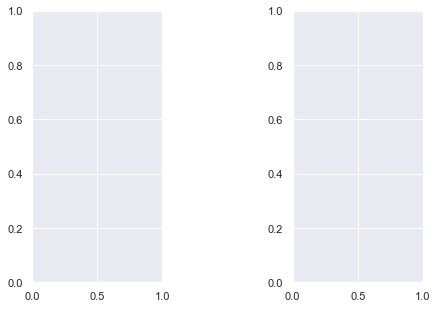

In [64]:
# Contract Type

df_yes = df[df['Churn']==1]
df_no = df[df['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_no['Contract'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(df_yes['Contract'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

In [ ]:
# The proportion of Month-to-Month contract is distinctly high among the customers who have churned away


D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None]

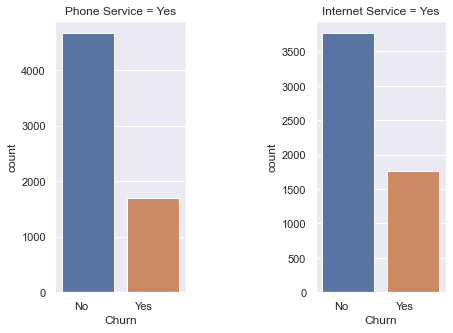

In [65]:
# Phone Service and Internet Service

df_phone = df[df['PhoneService']=='Yes']
df_internet = df[df['InternetService']!='No']


fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_phone['Churn'], ax=ax[0])
ax[0].set_title('Phone Service = Yes')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="right")

sns.countplot(df_internet['Churn'], ax=ax[1])
ax[1].set_title('Internet Service = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="right")

In [ ]:
# Among the users of Phone and Internet Service, the proportions of the customers churning are pretty close


D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None]

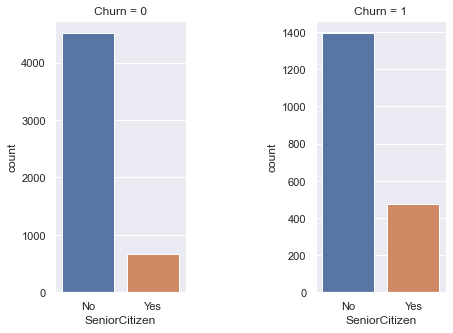

In [64]:
# Senior Citizens

# Gender

df_yes = df[df['Churn']==1]
df_no = df[df['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_no['SeniorCitizen'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_yes['SeniorCitizen'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")

D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\pythonjb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None]

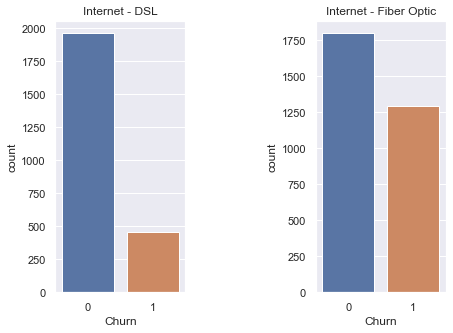

In [66]:
# Users of DSL and Fiber Optic Internet Service

df_dsl = df[df['InternetService']=='DSL']
df_fiber = df[df['InternetService']=='Fiber optic']

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_dsl['Churn'], ax=ax[0])
ax[0].set_title('Internet - DSL')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_fiber['Churn'], ax=ax[1])
ax[1].set_title('Internet - Fiber Optic')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")

In [ ]:
# It is clearly visible that the proportion of customers churning is higher the users of the Fiber optic internet 


Text(0, 0.5, 'Monthly Charges ($)')

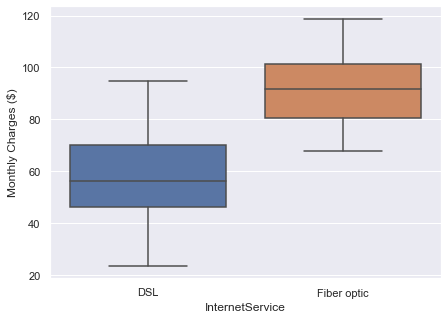

In [67]:
# let's check the prices of the DSL and Fiber Optic Internet Services using boxplot

df_dsl_fiber = df[df['InternetService']!='No']

internet = sns.boxplot(x = df_dsl_fiber.InternetService, y = df_dsl_fiber.MonthlyCharges)
internet.set_ylabel('Monthly Charges ($)')

In [ ]:
# Fiber optic services are more expensive than the DSL services


In [68]:
# Converting tenure into smaller buckets

bins = [0,6,12,18,24,36,48,60,72,84]
df['Tenure_grouped'] = pd.cut(df['tenure'], bins)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"(0, 6]"
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,"(24, 36]"
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"(0, 6]"
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"(36, 48]"
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"(0, 6]"


In [69]:
# Removing the continuous version of tenure

df.drop('tenure', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"(0, 6]"
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,"(24, 36]"
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"(0, 6]"
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"(36, 48]"
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"(0, 6]"


In [70]:
# Checking the datatypes
df.dtypes

gender                object
SeniorCitizen         object
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                  int64
Tenure_grouped      category
dtype: object

In [72]:
# Converting the categorical variables into dummy variables

df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_999.8,TotalCharges_999.9,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,29.85,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56.95,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,53.85,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.30,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


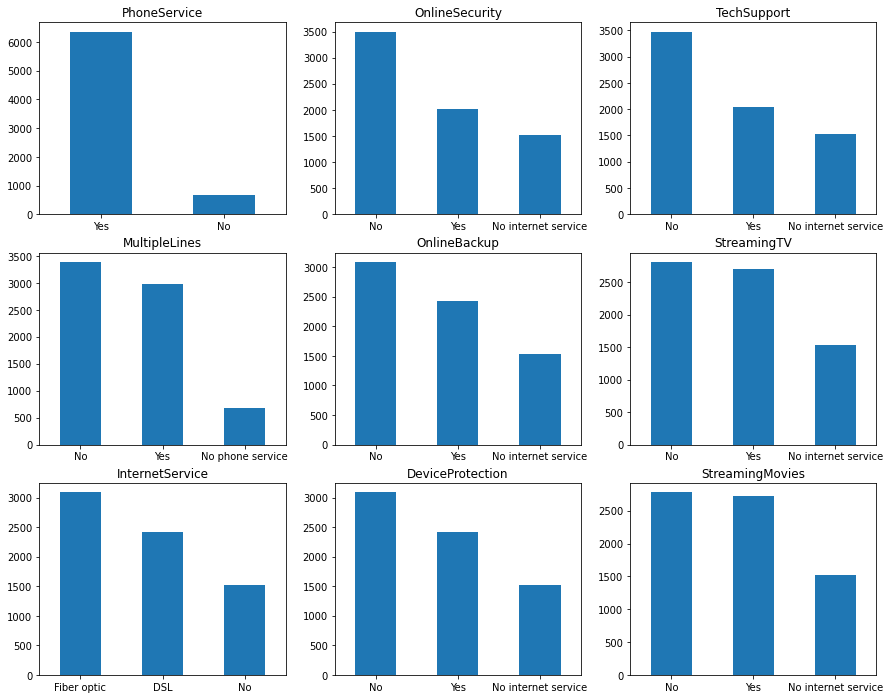

In [11]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

In [12]:
# Splitting the data into train and test datasets
# Test will 30% of the orginal dataframe

y = df['Churn']
X = df.drop('Churn', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)